<a href="https://colab.research.google.com/github/jamelof23/Latent_Attribute_Privacy/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fatal: destination path 'Latent_Attribute_Privacy' already exists and is not an empty directory.
✅ Generator ready.
[INFO] Upload latent .npy (shape (1,512) or (512,))


Saving 777.npy to 777 (1).npy
Original latent image:


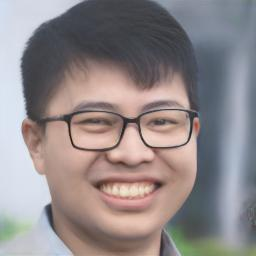

In [3]:
# Setup + load InterfaceGAN generator (GPU) + boundaries + latent
# ==== ENV & REPO ====
import os, sys, io, cv2, numpy as np
from PIL import Image
import IPython.display as display

os.chdir('/content')
CODE_DIR = 'Latent_Attribute_Privacy'
!git clone -q https://github.com/jamelof23/Latent_Attribute_Privacy $CODE_DIR
os.chdir(f'./{CODE_DIR}/models/interfacegan_official')
!mkdir -p models/pretrain
!wget -q https://www.dropbox.com/s/qyv37eaobnow7fu/stylegan_ffhq.pth?dl=1 -O models/pretrain/stylegan_ffhq.pth

# ==== IMPORTS ====
from models.model_settings import MODEL_POOL
from models.stylegan_generator import StyleGANGenerator

def build_generator(model_name):
    gan_type = MODEL_POOL[model_name]['gan_type']
    assert gan_type == 'stylegan'
    return StyleGANGenerator(model_name)

model_name = "stylegan_ffhq"
latent_space_type = "W"  # we work in W
generator = build_generator(model_name)
synthesis_kwargs = {'latent_space_type': 'W'}
print("✅ Generator ready.")

# ==== BOUNDARIES: Age (target), Gender (non-target) ====
# Put your .npy boundaries under: Latent_Attribute_Privacy/models/interfacegan_official/boundaries/
# e.g. stylegan_ffhq_age_w_boundary.npy, stylegan_ffhq_gender_w_boundary.npy
age_path    = 'boundaries/stylegan_ffhq_age_w_boundary.npy'
gender_path = 'boundaries/stylegan_ffhq_gender_w_boundary.npy'
assert os.path.exists(age_path) and os.path.exists(gender_path), "Boundary npy files not found."

b_age    = np.load(age_path).astype(np.float64).reshape(-1)
b_gender = np.load(gender_path).astype(np.float64).reshape(-1)

# Normalize
b_age   /= (np.linalg.norm(b_age) + 1e-12)
b_gender/= (np.linalg.norm(b_gender) + 1e-12)

# ==== UPLOAD LATENT ====
from google.colab import files
print("[INFO] Upload latent .npy (shape (1,512) or (512,))")
uploaded = files.upload()
latent_path = list(uploaded.keys())[0]
latent_codes = np.load(latent_path).astype(np.float64)
if latent_codes.ndim == 2 and latent_codes.shape == (1,512):
    w0 = latent_codes[0]
elif latent_codes.ndim == 1 and latent_codes.shape[0] == 512:
    w0 = latent_codes
else:
    raise ValueError(f"Latent must be (1,512) or (512,), got {latent_codes.shape}")

# Quick preview synth
def imshow(image, viz=256):
    h, w, _ = image.shape
    if (h,w)!=(viz,viz):
        image = cv2.resize(image, (viz, viz))
    buf = io.BytesIO(); Image.fromarray(image.astype(np.uint8)).save(buf,'jpeg')
    display.display(display.Image(buf.getvalue()))

x0 = generator.easy_synthesize(w0[np.newaxis,:], **synthesis_kwargs)['image'][0]
print("Original latent image:")
imshow(x0)


Subspace dim k=1, ambient d=512
Reference (edited) image:


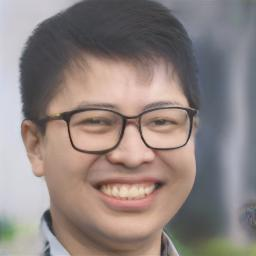

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


open_clip_model.safetensors:   0%|          | 0.00/599M [00:00<?, ?B/s]

In [4]:
# ==== SUBSPACE S from boundaries (Age target; can add more cols for joint case) ====
# For single-attribute Age: N = [b_age]; for joint add more columns, e.g., np.stack([b_age, b_smile, ...], 1)
N = b_age[:,None]  # d x k ; here k=1
# Orthonormalize N -> Q_S (Gram–Schmidt via QR)
Q, _ = np.linalg.qr(N)  # d x k, columns orthonormal
k = Q.shape[1]
d = Q.shape[0]
print(f"Subspace dim k={k}, ambient d={d}")

# Projector Pi_S = Q Q^T (we'll use Q directly for sampling)
# Pi_S = Q @ Q.T  # not needed explicitly for sampling

# ==== Reference edit w_ref = w0 + alpha * b_age ====
alpha = 2.0  # edit strength along Age
w_ref = w0 + alpha * b_age
x_ref = generator.easy_synthesize(w_ref[np.newaxis,:], **synthesis_kwargs)['image'][0]
Image.fromarray(x_ref.astype(np.uint8)).save('/content/ref.png')
print("Reference (edited) image:")
imshow(x_ref)

# ==== CLIP scorer f_S  (public attribute scorer) ====
!pip -q install open_clip_torch ftfy regex
import torch, open_clip

device = 'cuda' if torch.cuda.is_available() else 'cpu'
clip_model, clip_preprocess, _ = open_clip.create_model_and_transforms(
    'ViT-B-16', pretrained='laion2b_s34b_b88k', device=device)
clip_tokenizer = open_clip.get_tokenizer('ViT-B-16')

# Prepare text prompts once
texts_age    = clip_tokenizer(["a young person", "an old person"]).to(device)
texts_gender = clip_tokenizer(["a photo of a man", "a photo of a woman"]).to(device)

with torch.no_grad():
    text_emb_age    = clip_model.encode_text(texts_age);    text_emb_age /= text_emb_age.norm(dim=-1, keepdim=True)
    text_emb_gender = clip_model.encode_text(texts_gender); text_emb_gender /= text_emb_gender.norm(dim=-1, keepdim=True)
logit_scale = clip_model.logit_scale.exp().item()

def _prep_batch(np_batch):
    # np_batch: list/array of HxWx3 uint8
    ims = [Image.fromarray(img.astype(np.uint8)) for img in np_batch]
    ims = torch.stack([clip_preprocess(im) for im in ims]).to(device)
    return ims

@torch.no_grad()
def clip_scores(np_batch):
    """
    Returns dict with scalar logits for age (old-young) and gender (woman-man).
    Each entry shape: [batch]
    """
    ims = _prep_batch(np_batch)
    img_emb = clip_model.encode_image(ims); img_emb /= img_emb.norm(dim=-1, keepdim=True)
    # logits = scale * cosine sim
    logits_age    = logit_scale * (img_emb @ text_emb_age.T)      # [B,2]
    logits_gender = logit_scale * (img_emb @ text_emb_gender.T)   # [B,2]
    # Use logit differences as scalar scores (more linear than probabilities)
    age_score    = (logits_age[:,1] - logits_age[:,0]).detach().cpu().numpy()       # old - young
    gender_score = (logits_gender[:,1] - logits_gender[:,0]).detach().cpu().numpy() # woman - man
    return {'age': age_score, 'gender': gender_score}


In [9]:
# Estimate L_s by finite differences
# ==============================
# L_S ESTIMATION (central diff, chunked)
# ==============================
import numpy as np

def estimate_Ls_central_diff_chunked(
    w_ref: np.ndarray,
    Q: np.ndarray,
    scorer_fn,                 # callable: np_batch[H,W,3] -> np.array shape [B] or [B,m]
    h: float = 0.05,
    num_dirs: int = 32,
    seed: int = 42,
    batch_size: int = None,    # override; if None, use generator.batch_size or 4
    vector_norm_axis: int = -1 # if scorer returns [B,m], take L2 along this axis
):
    """
    Estimates ||J_f(w_ref) Q||_2 using central differences along random unit vectors v in R^k:
        ||J_f Q||_2 ≈ max_v || f(w_ref + h Q v) - f(w_ref - h Q v) || / (2h)

    Args:
        w_ref:         (d,) latent reference (e.g., w0 + alpha * b_age)
        Q:             (d,k) orthonormal basis for subspace S (columns unit & orthogonal)
        scorer_fn:     function mapping a batch of images (np.uint8, [B,H,W,3]) to scores
                       - scalar case: returns [B]
                       - vector case: returns [B, m]; we take L2 norm across m
        h:             finite-difference step size
        num_dirs:      number of random directions v in R^k
        seed:          RNG seed for reproducibility
        batch_size:    synthesize in chunks of this size; default: generator.batch_size or 4
        vector_norm_axis: axis for norm if scorer returns [B,m] (default last axis)

    Returns:
        Ls_hat: float  (max directional derivative magnitude)
        deriv:  np.ndarray shape [num_dirs] with per-direction derivative magnitudes
    """
    assert Q.ndim == 2, "Q must be (d,k)"
    d, k = Q.shape
    assert w_ref.shape[0] == d, f"w_ref shape {w_ref.shape} not compatible with Q (d={d})"

    rng = np.random.default_rng(seed)
    dirs = rng.normal(size=(num_dirs, k))
    dirs /= (np.linalg.norm(dirs, axis=1, keepdims=True) + 1e-12)  # unit vectors in R^k

    # Determine safe batch size
    bs_default = int(max(1, getattr(generator, 'batch_size', 4)))
    bs = int(batch_size) if batch_size is not None else bs_default

    deriv_all = []

    for start in range(0, num_dirs, bs):
        vblock = dirs[start:start+bs]      # [b,k]
        lat_plus, lat_minus = [], []

        for v in vblock:
            dv = (Q @ v).astype(np.float64)      # [d]
            lat_plus.append (w_ref + h*dv)
            lat_minus.append(w_ref - h*dv)

        lat_plus  = np.stack(lat_plus,  axis=0)  # [b,d]
        lat_minus = np.stack(lat_minus, axis=0)  # [b,d]

        # Synthesize + score
        imgs_plus  = generator.easy_synthesize(lat_plus,  **synthesis_kwargs)['image']  # [b,H,W,3]
        imgs_minus = generator.easy_synthesize(lat_minus, **synthesis_kwargs)['image']  # [b,H,W,3]

        s_plus  = scorer_fn(imgs_plus)   # [b] or [b,m]
        s_minus = scorer_fn(imgs_minus)  # [b] or [b,m]

        # Convert to magnitudes
        s_plus  = np.asarray(s_plus)
        s_minus = np.asarray(s_minus)

        if s_plus.ndim == 1:
            # scalar case
            deriv_blk = np.abs(s_plus - s_minus) / (2*h)            # [b]
        elif s_plus.ndim == 2:
            # vector case: take L2 across attributes
            diff = s_plus - s_minus                                 # [b,m]
            deriv_blk = np.linalg.norm(diff, axis=vector_norm_axis) / (2*h)  # [b]
        else:
            raise ValueError(f"scorer_fn must return [B] or [B,m], got shape {s_plus.shape}")

        deriv_all.append(deriv_blk)

    deriv = np.concatenate(deriv_all, axis=0)  # [num_dirs]
    Ls_hat = float(np.max(deriv))
    return Ls_hat, deriv


# ---------- Convenience wrapper for your current CLIP setup ----------

def clip_age_scalar(np_batch):
    """Use CLIP 'age' scalar score as f (old - young logits). Returns [B]."""
    return clip_scores(np_batch)['age']

def clip_age_gender_vector(np_batch):
    """Vector scorer f = [age, gender]. Returns [B, 2]."""
    s = clip_scores(np_batch)
    return np.stack([s['age'], s['gender']], axis=1)


# Example use (single-attribute, matches your current run):
Ls_hat, _ = estimate_Ls_central_diff_chunked(
    w_ref=w_ref,
    Q=Q,
    scorer_fn=clip_age_scalar,      # or clip_age_gender_vector for joint case
    h=0.05,
    num_dirs=32,
    seed=42
)

SAFETY = 1.25   # implementation-notes margin
Ls_est_safe = Ls_hat * SAFETY
print(f"L_S estimate @w_ref: {Ls_hat:.4f}   (with safety margin → {Ls_est_safe:.4f})")



L_S estimate @w_ref: 12.6065   (with safety margin → 15.7582)


In [10]:
#Monte‑Carlo experiment using your calibration
from skimage.metrics import structural_similarity as ssim
import numpy as np, math, os
from PIL import Image

# Budgets (paper)
eps_list = [0.2, 0.5, 1.0, 2.0]
delta = 1e-5
tau_list = [0.5, 1.0]
K = 200  # samples per budget

out_dir = '/content/results_empirical'
os.makedirs(out_dir, exist_ok=True)

# Metrics
def identity_ssim(img_ref, img):
    return float(ssim(img_ref, img, channel_axis=2, data_range=255))
def perceptual_1mssim(img_ref, img):
    return 1.0 - identity_ssim(img_ref, img)

# Attack via CLIP (target ‘age’), label from reference
y_ref = (clip_scores([x_ref])['age'][0] >= 0.0)
def attack_success(img):
    return 1 if (clip_scores([img])['age'][0] >= 0.0) == y_ref else 0

# Leakage via CLIP (non-target ‘gender’)
g_ref = clip_scores([x_ref])['gender'][0]
def leakage(img):
    return abs(clip_scores([img])['gender'][0] - g_ref)

def clip_to_tau(vec, tau):
    n = np.linalg.norm(vec)
    return vec if n <= tau else vec * (tau / n)

csv_path = f"{out_dir}/summary_age_CLIPcalibrated.csv"
if not os.path.exists(csv_path):
    with open(csv_path, 'w') as f:
        f.write('method,eps,delta,tau,sigma,Ls_est,attack_mean,attack_std,'
                'leak_mean,leak_std,id_mean,id_std,perc_mean,perc_std,alpha\n')

d = Q.shape[0]; k = Q.shape[1]

for tau in tau_list:
    for eps in eps_list:
        sigma = (Ls_est_safe * tau * math.sqrt(2.0 * math.log(1.25/delta))) / eps
        tag = f'eps{eps}_del{delta}_tau{tau}_sig{round(sigma,4)}'
        print(f"[τ={tau}] [ε={eps}] σ={sigma:.4f}  (L_S={Ls_est_safe:.4f})")

        iso_stats, sub_stats = [], []

        for ksample in range(K):
            # Subspace (your mechanism): Δw = Q z, z~N(0,σ^2 I_k), then clip
            z = np.random.normal(0.0, sigma, size=(k,))
            dw_sub = (Q @ z).astype(np.float64)
            dw_sub = clip_to_tau(dw_sub, tau)

            # Isotropic baseline: sample unit dir u in R^d, norm-match to ||dw_sub||, then clip
            u = np.random.normal(0.0, 1.0, size=(d,))
            u /= (np.linalg.norm(u) + 1e-12)
            dw_iso = u * (np.linalg.norm(dw_sub) + 1e-12)
            dw_iso = clip_to_tau(dw_iso, tau)

            # Synthesize
            x_sub = generator.easy_synthesize((w_ref + dw_sub)[np.newaxis,:], **synthesis_kwargs)['image'][0]
            x_iso = generator.easy_synthesize((w_ref + dw_iso)[np.newaxis,:], **synthesis_kwargs)['image'][0]

            # Metrics
            atk_sub = attack_success(x_sub)
            atk_iso = attack_success(x_iso)
            leak_sub = leakage(x_sub)
            leak_iso = leakage(x_iso)
            id_sub = identity_ssim(x_ref, x_sub)
            id_iso = identity_ssim(x_ref, x_iso)
            pq_sub = perceptual_1mssim(x_ref, x_sub)
            pq_iso = perceptual_1mssim(x_ref, x_iso)

            sub_stats.append((atk_sub, leak_sub, id_sub, pq_sub))
            iso_stats.append((atk_iso, leak_iso, id_iso, pq_iso))

            if ksample < 6:  # save a few for F1
                base = f"{out_dir}/age_{tag}_k{ksample}"
                Image.fromarray(x_ref.astype(np.uint8)).save(base + "_ref.png")
                Image.fromarray(x_iso.astype(np.uint8)).save(base + "_iso.png")
                Image.fromarray(x_sub.astype(np.uint8)).save(base + "_sub.png")

        def agg(stats):
            A = np.array(stats, dtype=float)
            return np.nanmean(A, axis=0), np.nanstd(A, axis=0)

        m_iso, s_iso = agg(iso_stats)
        m_sub, s_sub = agg(sub_stats)

        with open(csv_path, 'a') as f:
            f.write(f'iso,{eps},{delta},{tau},{sigma},{Ls_est_safe},'
                    f'{m_iso[0]},{s_iso[0]},{m_iso[1]},{s_iso[1]},'
                    f'{m_iso[2]},{s_iso[2]},{m_iso[3]},{s_iso[3]},{alpha}\n')
            f.write(f'sub,{eps},{delta},{tau},{sigma},{Ls_est_safe},'
                    f'{m_sub[0]},{s_sub[0]},{m_sub[1]},{s_sub[1]},'
                    f'{m_sub[2]},{s_sub[2]},{m_sub[3]},{s_sub[3]},{alpha}\n')

print("✅ calibrated run complete → /content/results_empirical")



[τ=0.5] [ε=0.2] σ=190.8631  (L_S=15.7582)
[τ=0.5] [ε=0.5] σ=76.3453  (L_S=15.7582)
[τ=0.5] [ε=1.0] σ=38.1726  (L_S=15.7582)
[τ=0.5] [ε=2.0] σ=19.0863  (L_S=15.7582)
[τ=1.0] [ε=0.2] σ=381.7263  (L_S=15.7582)
[τ=1.0] [ε=0.5] σ=152.6905  (L_S=15.7582)
[τ=1.0] [ε=1.0] σ=76.3453  (L_S=15.7582)
[τ=1.0] [ε=2.0] σ=38.1726  (L_S=15.7582)
✅ calibrated run complete → /content/results_empirical


In [11]:
#Make F2–F5 plots and a simple F1 grid
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import math, glob

df = pd.read_csv(f"{out_dir}/summary_age_CLIPcalibrated.csv")

def plot_metric(metric, ylabel, tau):
    sub = df[df['tau']==tau]
    plt.figure()
    for method in ['iso','sub']:
        d = sub[sub['method']==method].sort_values('eps')
        y = d[metric].values
        yerr = d[metric.replace('mean','std')].values
        plt.errorbar(d['eps'], y, yerr=yerr, marker='o', label=method)
    plt.xlabel('ε'); plt.ylabel(ylabel); plt.title(f'{ylabel} vs ε (τ={tau})')
    plt.legend(); plt.grid(True, alpha=0.2)
    fn = f"{out_dir}/{metric}_vs_eps_tau{tau}.png"
    plt.savefig(fn, bbox_inches='tight'); plt.close()
    print("Saved", fn)

for tau in sorted(df['tau'].unique()):
    plot_metric('attack_mean', 'Attack success (↓)', tau)       # F2
    plot_metric('leak_mean',   'Non-target leakage (↓)', tau)    # F3
    plot_metric('id_mean',     'Identity SSIM (↑)', tau)         # F4
    # F5: Privacy vs Perceptual
    sub = df[df['tau']==tau]
    plt.figure()
    for method in ['iso','sub']:
        d = sub[sub['method']==method]
        plt.scatter(1 - d['attack_mean'], d['perc_mean'], label=method)
    plt.xlabel('Privacy = 1 - attack success (↑)')
    plt.ylabel('Perceptual loss = 1 - SSIM (↓)')
    plt.title(f'Privacy–Utility tradeoff (τ={tau})'); plt.legend(); plt.grid(True, alpha=0.2)
    fn = f"{out_dir}/privacy_utility_tau{tau}.png"
    plt.savefig(fn, bbox_inches='tight'); plt.close(); print("Saved", fn)

# F1 grid (use k0 triplets for each budget)
rows = []
for tau in sorted(df['tau'].unique()):
    for eps in sorted(df['eps'].unique()):
        sigma = round((df[(df['tau']==tau)&(df['eps']==eps)]['sigma'].iloc[0]), 4)
        base = f"{out_dir}/age_eps{eps}_del1e-05_tau{tau}_sig{sigma}_k0"
        trip = []
        for suff in ['_ref.png','_iso.png','_sub.png']:
            p = base + suff
            if not os.path.exists(p):
                trip=[]
                break
            trip.append(Image.open(p))
        if trip:
            w = sum(im.width for im in trip); h = max(im.height for im in trip)
            row = Image.new('RGB', (w,h))
            x=0
            for im in trip:
                row.paste(im, (x,0)); x+=im.width
            rows.append(row)

if rows:
    H = sum(r.height for r in rows); W = max(r.width for r in rows)
    grid = Image.new('RGB', (W,H)); y=0
    for r in rows:
        grid.paste(r,(0,y)); y += r.height
    grid_path = f"{out_dir}/F1_qual_grid.png"
    grid.save(grid_path)
    print("Saved", grid_path)
else:
    print("F1 grid assembly skipped (no triplets found).")


Saved /content/results_empirical/attack_mean_vs_eps_tau0.5.png
Saved /content/results_empirical/leak_mean_vs_eps_tau0.5.png
Saved /content/results_empirical/id_mean_vs_eps_tau0.5.png
Saved /content/results_empirical/privacy_utility_tau0.5.png
Saved /content/results_empirical/attack_mean_vs_eps_tau1.0.png
Saved /content/results_empirical/leak_mean_vs_eps_tau1.0.png
Saved /content/results_empirical/id_mean_vs_eps_tau1.0.png
Saved /content/results_empirical/privacy_utility_tau1.0.png
Saved /content/results_empirical/F1_qual_grid.png
